In [1]:
from src import MERGE_CPTEC

In [2]:
# Baixando dado diario de um dia específico
# Serão salvos na pasta teste
#OBS.: Na questão pedia download de um arquivo horário mas o link-base apontava para o dado diário | Peguei o diário :)
arquivo = MERGE_CPTEC.baixar_dados(discretizacao='diario',data_string='29-09-2021', diretorio_saida='download')

MERGE_CPTEC_20210929.grib2 [ok]


## Conversão grib -> netcdf

In [3]:
# instalamos CDO | conjunto de comandos estatíticos e aritméticos para grib e netcdf
# convertemos os arquivos grib2 para netcdf
#!apt-get update #atualizamo o pacote de requisições nativo do ubuntu
#!apt-get install cdo
!cdo -f nc copy download/MERGE_CPTEC_20210929.grib2 download/file.nc

cdo copy/selall : UNCHANGED_RECORD=0
cdo copy/selall : cdiGribDataScanningMode=0; lcopy=0
cdo    copy:   1cdo    copy: Processed 2 variables over 1 timestep [0.43s 79MB].


## Recorte Tietê

In [4]:
from src import recorta_chuva

In [5]:
arquivo_nc = 'download/file.nc'
shapefile = 'contorno/tiete.shp'

In [13]:
chuva_recortada = recorta_chuva.main(arquivo_nc, shapefile)

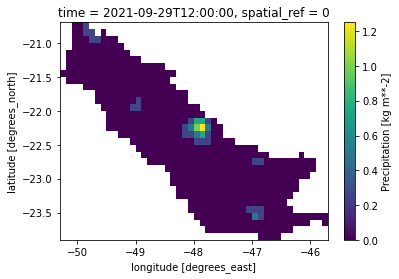

In [14]:
chuva_recortada.plot()

In [18]:
chuva_recortada.to_netcdf('download/chuva_recorte_tiete.nc')

In [19]:
chuva_recortada

<xarray.DataArray 'prec' (time: 1, lat: 32, lon: 46)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  0.],
        ...,
        [nan, nan,  0., ..., nan, nan, nan],
        [nan, nan,  0., ..., nan, nan, nan],
        [nan, nan,  0., ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat          (lat) float64 -23.85 -23.75 -23.65 ... -20.95 -20.85 -20.75
  * lon          (lon) float64 -50.25 -50.15 -50.05 ... -45.95 -45.85 -45.75
  * time         (time) datetime64[ns] 2021-09-29T12:00:00
    spatial_ref  int64 0
Attributes:
    long_name:  Precipitation
    units:      kg m**-2
    param:      5.15.0